In [3]:
# Load the extension, disable it after development
%load_ext autoreload
%autoreload 2

from preprocess import *

import numpy as np
import pandas as pd

#from fastdtw import fastdtw
#from dtaidistance import dtw
#from scipy.spatial.distance import squareform, pdist

#import umap
#import hdbscan
#import sklearn.cluster as cluster
#from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(7,5)})

In [6]:
fnames = ['2019-08-{:02d}.pcl'.format(x) for x in range(22,32)]+['2019-09-{:02d}.pcl'.format(x) for x in range(1,11)]
evt_n = []
day_hist = pd.DataFrame()
for name in fnames:
    df = pd.read_pickle('../../data/'+name)
    ips = df.ip
    evt_n.append({'name': name, 'evts': len(df), 'ips':len(df.ip.unique())})
    
evt_n = pd.DataFrame(data=evt_n)
    

               evts            ips
count  2.000000e+01      20.000000
mean   2.325684e+06  177822.700000
std    3.499236e+05   30206.189843
min    1.474974e+06  150274.000000
25%    2.238210e+06  159084.500000
50%    2.341748e+06  167705.000000
75%    2.612088e+06  184360.750000
max    2.761862e+06  273360.000000


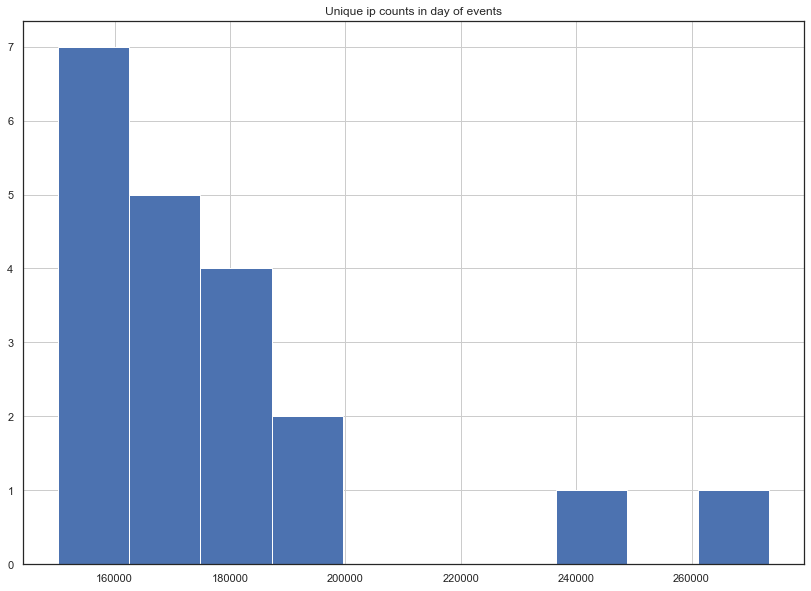

In [58]:
print(evt_n.describe())
plt.figure()
fig = evt_n.ips.hist()
plt.title('Unique ip counts in day of events')
plt.savefig('../../data/figures/ips_in_day.png')

In [7]:
ips = pd.Series(dtype=int)
for name in fnames:
    df = pd.read_pickle('../../data/'+name)
    tmp=pd.Series(data=df.groupby('ip')['timestamp'].agg('count').values)
    #ips.ip=ips.ip+name
    ips=pd.concat([ips, tmp], ignore_index=True)

ips.describe()

count    3.556454e+06
mean     1.307867e+01
std      1.913331e+02
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      5.000000e+00
max      9.930000e+04
dtype: float64

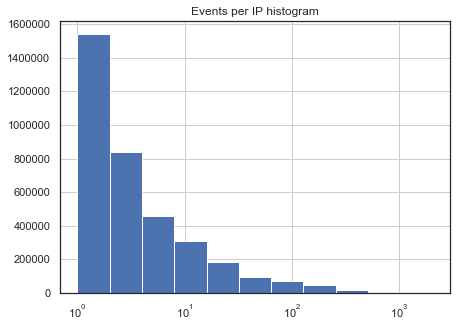

In [8]:
plt.figure()
ips.hist(bins=[1,2,4,8,16,32,64,128,256,512,1024,2048])
plt.xscale('log')
plt.title('Events per IP histogram')
plt.savefig('../../data/figures/events_per_ip.png')

